<a href="https://www.kaggle.com/code/mosesmoncy/bbc-news-sentiment-validation-using-nlp?scriptVersionId=126872585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

BBC News is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organization and generates about 120 hours of radio and television output each day, as well as online news coverage.

In this BBC News Validation Project, I built a predictive model to evaluate the various news records and classify them accordingly with the help of some parameters. The parameters into consideration are the various headlines with their respective categories.

Here the model is created to predict whether the news headline belongs to 'sport', 'business', 'politics', 'entertainment' or 'tech'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re  # regular expression ==> used to remove special characters

In [2]:
a=pd.read_csv('/kaggle/input/bbc-dataset/BBC News Train.csv',encoding='ISO-8859-1')
a

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [3]:
a1=pd.read_csv('/kaggle/input/bbc-dataset/BBC News Test.csv',encoding='ISO-8859-1')
a1

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [4]:
a2=pd.concat([a,a1],axis=0)
a2

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,NaN
731,373,u2 to play at grammy awards show irish rock ba...,NaN
732,1704,sport betting rules in spotlight a group of mp...,NaN
733,206,alfa romeos to get gm engines fiat is to sto...,NaN


In [5]:
a2.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
a2.tail()

,ArticleId,Text,Category
730,1923,eu to probe alitalia state aid the european ...,NaN
731,373,u2 to play at grammy awards show irish rock ba...,NaN
732,1704,sport betting rules in spotlight a group of mp...,NaN
733,206,alfa romeos to get gm engines fiat is to sto...,NaN
734,471,citizenship event for 18s touted citizenship c...,NaN


In [7]:
a2.shape

(2225, 3)

In [8]:
a2.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

In [9]:
a2.isna().sum()

ArticleId      0
Text           0
Category     735
dtype: int64

<AxesSubplot:>

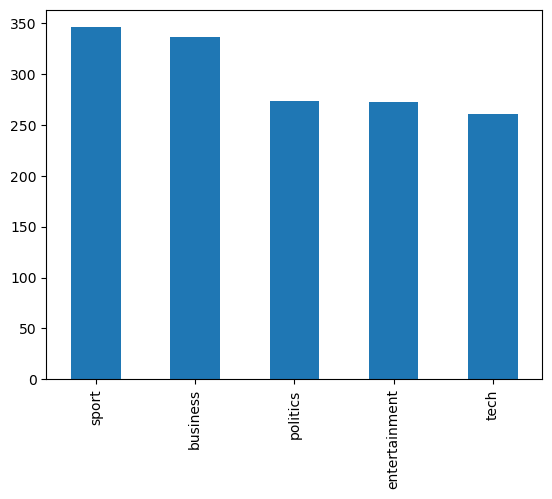

In [10]:
a.Category.value_counts().plot(kind='bar')

In [11]:
# dropping irrelevant rows from 'target'

a2.drop(a2.index[(a2['Category']=='Irrelevant')],axis=0,inplace=True)
a2

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,NaN
731,373,u2 to play at grammy awards show irish rock ba...,NaN
732,1704,sport betting rules in spotlight a group of mp...,NaN
733,206,alfa romeos to get gm engines fiat is to sto...,NaN


In [12]:
#dropping 'ArticleId'

a2=a2.drop(['ArticleId'],axis=1)

In [13]:
a2

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
...,...,...
730,eu to probe alitalia state aid the european ...,NaN
731,u2 to play at grammy awards show irish rock ba...,NaN
732,sport betting rules in spotlight a group of mp...,NaN
733,alfa romeos to get gm engines fiat is to sto...,NaN


In [14]:
a2.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [15]:
# replacing 'Neutral=0','Positive=1','Negative=-1'

a2['Category']=a2['Category'].map({'sport':1,'business':2,'politics':3,'entertainment':4,'tech':5})

In [16]:
a2

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,2.0
1,german business confidence slides german busin...,2.0
2,bbc poll indicates economic gloom citizens in ...,2.0
3,lifestyle governs mobile choice faster bett...,5.0
4,enron bosses in $168m payout eighteen former e...,2.0
...,...,...
730,eu to probe alitalia state aid the european ...,NaN
731,u2 to play at grammy awards show irish rock ba...,NaN
732,sport betting rules in spotlight a group of mp...,NaN
733,alfa romeos to get gm engines fiat is to sto...,NaN


In [17]:
a2.dtypes

Text         object
Category    float64
dtype: object

In [18]:
a2.isna().sum()

Text          0
Category    735
dtype: int64

In [19]:
# dropping missing values along with rows

a2=a2.dropna()

In [20]:
a2

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,2.0
1,german business confidence slides german busin...,2.0
2,bbc poll indicates economic gloom citizens in ...,2.0
3,lifestyle governs mobile choice faster bett...,5.0
4,enron bosses in $168m payout eighteen former e...,2.0
...,...,...
1485,double eviction from big brother model caprice...,4.0
1486,dj double act revamp chart show dj duo jk and ...,4.0
1487,weak dollar hits reuters revenues at media gro...,2.0
1488,apple ipod family expands market apple has exp...,5.0


In [21]:
a2.isna().sum()

Text        0
Category    0
dtype: int64

In [22]:
a2.shape

(1490, 2)

In [23]:
# preprocessing 'Message_body'

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [24]:
text=a2['Text']
text

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

In [25]:
# Preprocessing 

# tokenisation
from nltk.tokenize import TweetTokenizer
tokens=TweetTokenizer()
text=text.apply(lambda x:tokens.tokenize(x)).apply(lambda x:" ".join(x))  
text

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle governs mobile choice faster better ...
4       enron bosses in $ 168m payout eighteen former ...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

In [26]:
# remove special characters
# we use re  ==> regular expression

text=text.str.replace('[^a-zA-Z-0-9]+',' ') 
text

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle governs mobile choice faster better ...
4       enron bosses in 168m payout eighteen former en...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

In [27]:
# Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in tokens.tokenize(x)]).apply(lambda x:' '.join(x))
text

0       worldcom ex-boss launch defenc lawyer defend f...
1       german busi confid slide german busi confid fe...
2       bbc poll indic econom gloom citizen in a major...
3       lifestyl govern mobil choic faster better or f...
4       enron boss in 168m payout eighteen former enro...
                              ...                        
1485    doubl evict from big brother model capric and ...
1486    dj doubl act revamp chart show dj duo jk and j...
1487    weak dollar hit reuter revenu at media group r...
1488    appl ipod famili expand market appl has expand...
1489    santi worm make unwelcom visit thousand of web...
Name: Text, Length: 1490, dtype: object

In [28]:
# remove stop words

from nltk.corpus import stopwords
sw=stopwords.words('english')
text=text.apply(lambda x:[i for i in tokens.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
text

0       worldcom ex-boss launch defenc lawyer defend f...
1       german busi confid slide german busi confid fe...
2       bbc poll indic econom gloom citizen major nati...
3       lifestyl govern mobil choic faster better funk...
4       enron boss 168m payout eighteen former enron d...
                              ...                        
1485    doubl evict big brother model capric holbi cit...
1486    dj doubl act revamp chart show dj duo jk joel ...
1487    weak dollar hit reuter revenu media group reut...
1488    appl ipod famili expand market appl expand ipo...
1489    santi worm make unwelcom visit thousand websit...
Name: Text, Length: 1490, dtype: object

In [29]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x=vector.fit_transform(text)
print(x)

  (0, 958)	0.04519201908811042
  (0, 16474)	0.03687701723060667
  (0, 4686)	0.030163534647254464
  (0, 4005)	0.04336124331560259
  (0, 16550)	0.0638767010528885
  (0, 3175)	0.0654245999130452
  (0, 1380)	0.03423499887548394
  (0, 16865)	0.023178372821512472
  (0, 9224)	0.019115217626709542
  (0, 10135)	0.11867621530862936
  (0, 9044)	0.0346168496876456
  (0, 398)	0.027200126718897294
  (0, 12452)	0.0360358447709212
  (0, 2239)	0.04637473347407754
  (0, 5665)	0.038805759305269916
  (0, 4216)	0.04926348331633989
  (0, 17274)	0.01423489318001711
  (0, 1024)	0.051931532706968764
  (0, 13906)	0.048306429355593386
  (0, 8579)	0.0456485279863669
  (0, 6066)	0.05570629615805029
  (0, 4302)	0.019333701663738934
  (0, 3998)	0.04047249347334023
  (0, 2022)	0.055575636000291015
  (0, 16143)	0.06725537568555302
  :	:
  (1489, 1238)	0.034877885442245765
  (1489, 16983)	0.035927812937048276
  (1489, 13854)	0.03842047889285447
  (1489, 15662)	0.019636324385510506
  (1489, 12412)	0.20431220453525192
  

In [30]:
y=a2['Category'].values  
y

array([2., 2., 2., ..., 2., 5., 5.])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

<1043x17390 sparse matrix of type '<class 'numpy.float64'>'
	with 155896 stored elements in Compressed Sparse Row format>

In [32]:
y_train

array([4., 5., 5., ..., 3., 4., 1.])

<AxesSubplot:ylabel='Category'>

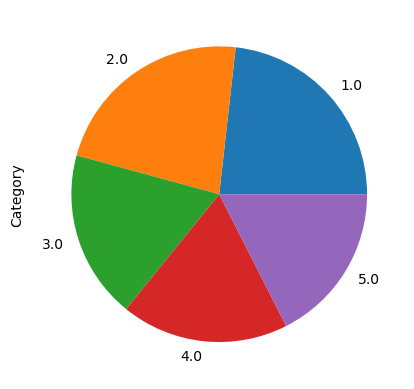

In [33]:
# plot a bar Chart for 'Category'

a2['Category'].value_counts().plot(kind='pie')

In [34]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=MultinomialNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[100   1   0   0   0]
 [  0 102   3   0   3]
 [  1   2  81   0   2]
 [  1   0   4  73   1]
 [  0   1   5   2  65]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.941834451901566
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99       101
         2.0       0.96      0.94      0.95       108
         3.0       0.87      0.94      0.91        86
         4.0       0.97      0.92      0.95        79
         5.0       0.92      0.89      0.90        73

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.94       447
weighted avg       0.94      0.94      0.94       447

the classification details of model MultinomialNB() is below
the confusion matrix of  MultinomialNB() is
[[

In [36]:
a2.head(15)

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,2.0
1,german business confidence slides german busin...,2.0
2,bbc poll indicates economic gloom citizens in ...,2.0
3,lifestyle governs mobile choice faster bett...,5.0
4,enron bosses in $168m payout eighteen former e...,2.0
5,howard truanted to play snooker conservative...,3.0
6,wales silent on grand slam talk rhys williams ...,1.0
7,french honour for director parker british film...,4.0
8,car giant hit by mercedes slump a slump in pro...,2.0
9,fockers fuel festive film chart comedy meet th...,4.0


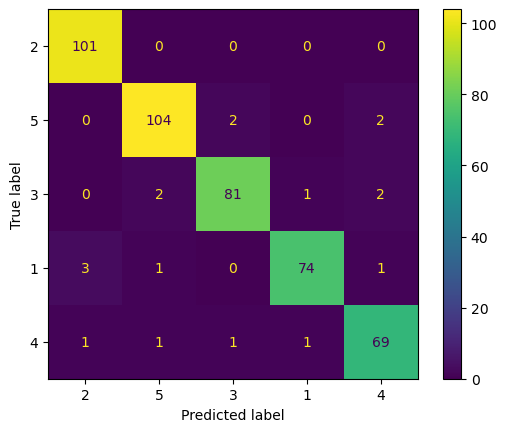

In [37]:
from sklearn.metrics._plot.confusion_matrix  import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
matrixmodel=KNeighborsClassifier(n_neighbors=9)
result=confusion_matrix(y_test,y_pred)
cm=['2','5','3','1','4']   # we should place the class labels according to the data set
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
cmd.plot()